In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/Q2.csv")

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
print(data.describe())
data.head()


       Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000        40.000000      4.000000   
25%         3.000000        54.000000      5.000000   
50%         5.000000        69.000000      7.000000   
75%         7.000000        85.000000      8.000000   
max         9.000000        99.000000      9.000000   

       Sample Question Papers Practiced  Performance Index  
count                      10000.000000       10000.000000  
mean                           4.583300          55.224800  
std                            2.867348          19.212558  
min                            0.000000          10.000000  
25%                            2.000000          40.000000  
50%                            5.000000          55.000000  
75%                            7.000000          71.000000  
max             

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
data.loc[data['Extracurricular Activities'] == 'No', 'Extracurricular Activities'] = 0
data.loc[data['Extracurricular Activities'] == 'Yes', 'Extracurricular Activities'] = 1
data.head()


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled

array([[ 0.77518771,  1.70417565,  1.01045465,  1.45620461, -1.24975394,
         1.86216688],
       [-0.38348058,  0.72391268, -0.98965352, -1.49229423, -0.90098215,
         0.50881766],
       [ 1.16141048, -1.06362569,  1.01045465,  0.27680507, -0.90098215,
        -0.5322202 ],
       ...,
       [ 0.38896495,  0.7815752 ,  1.01045465,  0.86650484,  0.1453332 ,
         0.9772847 ],
       [ 1.54763324,  1.5888506 ,  1.01045465,  0.27680507, -1.59852572,
         2.07037446],
       [ 0.77518771,  0.26261245, -0.98965352,  0.86650484, -1.24975394,
         0.45676577]])

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_scaled[:,:-1], data_scaled[:,-1], test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.33, random_state=42)

In [7]:
import torch
from torch import nn
from torch import optim

input_dim = 2
hidden_dim = 10
output_dim = 1

class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NeuralNetwork, self).__init__()
        self.layer_1 = nn.Linear(input_dim, hidden_dim)
        nn.init.kaiming_uniform_(self.layer_1.weight, nonlinearity="relu")
        self.layer_2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = torch.nn.functional.relu(self.layer_1(x))
        x = torch.nn.functional.sigmoid(self.layer_2(x))

        return x

model = NeuralNetwork(input_dim, hidden_dim, output_dim)
print(model)


NeuralNetwork(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=1, bias=True)
)


In [16]:
import torch.optim as optim
def train():
 learning_rate = 0.1
 loss_fn = nn.BCELoss()

 optimizer = optim.Adam(model.parameters(), learning_rate)

 num_epochs = 100
 loss_values = []


 for epoch in range(num_epochs):

   # zero the parameter gradients
   optimizer.zero_grad()

   # forward + backward + optimize
   pred = model(X_train)
   loss = loss_fn(pred, y_train)
   loss_values.append(loss.item())
   loss.backward()
   optimizer.step()

 print("Training Complete")
 return loss_values


**Comparison of Mean Squared Error (MSE) and Adam
MSE:**
MSE or Mean Squared Error is a metric for evaluating the performance of regression models. It calculates the average squared difference between the actual and predicted values.

Advantages of MSE:

It is simple to calculate.

It is widely used in linear regression and other regression problems.

Disadvantages of MSE:

It is sensitive to the scale of the data.

It is sensitive to outliers.


Adam:

Adam is an optimization algorithm for training deep learning models. It has several advantages, including:

Fast convergence rate


Efficiency in problems with many parameters

Stability and robustness


Comparison:

Metric	MSE	Adam

Application	Evaluating the performance of regression models	Optimizing deep learning models
Advantages	Simple calculation, wide use	Fast convergence rate, high efficiency, stability
Disadvantages	Sensitivity to scale and outliers	More complexity
Choosing between MSE and Adam:

The choice between MSE and Adam depends on the type of model and your goal:

MSE: Suitable for evaluating the performance of regression models.

Adam: Suitable for training deep learning models.

TypeError: linear(): argument 'input' (position 1) must be Tensor, not numpy.ndarray

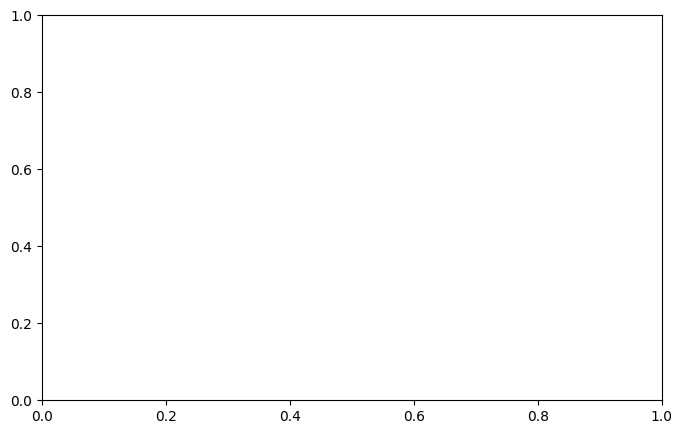

In [17]:
import matplotlib.pyplot as plt

step = np.linspace(0, 100, 10500)
# natoonestam erroresho befahmam:)
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(step, np.array(train()))
plt.title("Step-wise Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()